# 6. Artificial Neural Network

In [1]:
import torch
import torch.nn as nn

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

## 6-1. XOR Problem with Single-Layer Perceptron

In [3]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

### 단층 퍼셉트론 설계

In [4]:
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)

In [5]:
# 비용 함수와 옵티마이저 정의
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

> `nn.BCELoss()` : Binary Cross Entropy Loss

### 학습

In [6]:
#10,001번의 에포크 수행. 0번 에포크부터 10,000번 에포크까지.
for step in range(10001): 
    optimizer.zero_grad()
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 1000 == 0: # 1000번째 에포크마다 비용 출력
        print(step, cost.item())

0 0.7273973822593689
1000 0.6931471824645996
2000 0.6931471824645996
3000 0.6931471824645996
4000 0.6931471824645996
5000 0.6931471824645996
6000 0.6931471824645996
7000 0.6931471824645996
8000 0.6931471824645996
9000 0.6931471824645996
10000 0.6931471824645996


> loss가 200번 이후로는 0.6931471824645996로 고정되는 모습이다.  
이는 단층 퍼셉트론으로는 XOR 문제를 풀 수 없기 때문에 더 이상 loss가 줄지 않는 것이다.

> 한 번 결과를 확인해보자.

### 테스트

In [7]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


> 잘 예측하지 못하는 모습이다.

## 6-2. XOR Problem with Multi-Layer Perceptron

In [8]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

### 다층 퍼셉트론 설계

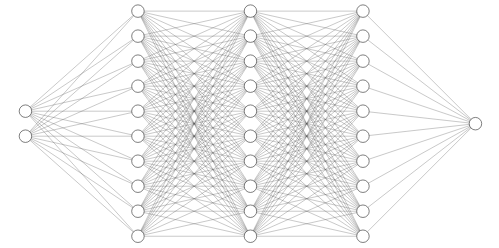

In [9]:
model = nn.Sequential(
          nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Sigmoid()
          ).to(device)

In [10]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1

### 학습

In [11]:
for epoch in range(10001):
    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    # 1000의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 1000 == 0:
        print(epoch, cost.item())

0 0.6940630674362183
1000 0.6930544376373291
2000 0.6926223039627075
3000 0.01770610921084881
4000 0.0009439812274649739
5000 0.00044696516124531627
6000 0.00028704528813250363
7000 0.00020948304154444486
8000 0.00016409801901318133
9000 0.00013445696095004678
10000 0.00011357376934029162


### 테스트

In [12]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[9.5505486e-05]
 [9.9987733e-01]
 [9.9988163e-01]
 [1.1768903e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


> 아주 잘 예측하는 모습이다.

## 6-3. Numeric Handwritten data Classification with Multi-Layer Perceptron

> 숫자 필기 데이터는 사이킷런 패키지에서 제공하는 분류용 예제 데이터다.  
0부터 9까지의 숫자를 손으로 쓴 이미지 데이터로,  
`load_digits()` 명령으로 불러올 수 있다.  
각 이미지는 0부터 15까지의 명암을 가지는 8×8 픽셀 해상도의 흑백 이미지다.  

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()

### 데이터 준비

In [14]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


> 0을 손글씨로 쓴거같은 이미지인데,  
실제로도 0인지 확인해보자.

In [15]:
print(digits.target[0])

0


> 전체 샘플 수를 확인해보자.

In [16]:
print(f'전체 샘플 수 : {len(digits.images)}')

전체 샘플 수 : 1797


> 이 중 상위 5개의 샘플을 시각화해보자.

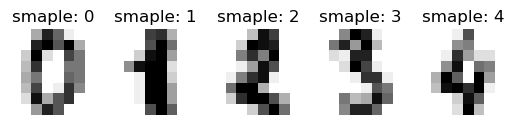

In [17]:
images_and_labels = list(zip(digits.images, digits.target))
for idx, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(1, 5, idx+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'smaple: {label}')

> 데이터 확인을 끝냈으니, 모델에 사용할 수 있게  
전체 데이터를 변수에 저장하자.

In [18]:
X = digits.data
Y = digits.target

### 다층 퍼셉트론 분류기 만들기

In [19]:
import torch
import torch.nn as nn
from torch import optim

In [43]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [21]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [22]:
loss_fn = nn.CrossEntropyLoss()

In [23]:
optimizer = optim.Adam(model.parameters())

In [24]:
losses = []

In [25]:
epochs = 200
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch:4d}/{epochs} Loss: {loss.item():.6f}')
    
    losses.append(loss.item())

Epoch    0/200 Loss: 2.661195
Epoch   10/200 Loss: 2.184336
Epoch   20/200 Loss: 1.999104
Epoch   30/200 Loss: 1.795641
Epoch   40/200 Loss: 1.572132
Epoch   50/200 Loss: 1.335512
Epoch   60/200 Loss: 1.085609
Epoch   70/200 Loss: 0.832516
Epoch   80/200 Loss: 0.610715
Epoch   90/200 Loss: 0.455051
Epoch  100/200 Loss: 0.347713
Epoch  110/200 Loss: 0.276363
Epoch  120/200 Loss: 0.226483
Epoch  130/200 Loss: 0.190552
Epoch  140/200 Loss: 0.163667
Epoch  150/200 Loss: 0.142854
Epoch  160/200 Loss: 0.126218
Epoch  170/200 Loss: 0.112641
Epoch  180/200 Loss: 0.101256
Epoch  190/200 Loss: 0.091639


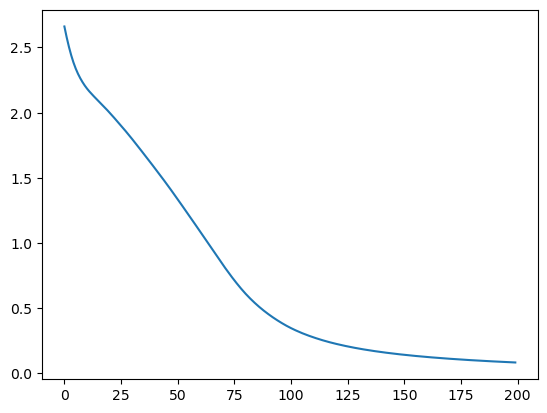

In [26]:
plt.plot(losses)
plt.show()

## 6-4. MNIST data Classification with Multi-Layer Perceptron

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

### 데이터 준비

In [28]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
mnist.data[0]

In [30]:
mnist.target[0]

'5'

In [31]:
mnist.target = mnist.target.astype(np.int8)

In [32]:
mnist.target[0]

5

In [37]:
X = mnist.data / 255 # 0~255값을 [0, 1] 구간으로 정규화
y = mnist.target

In [ ]:
X[0]

5


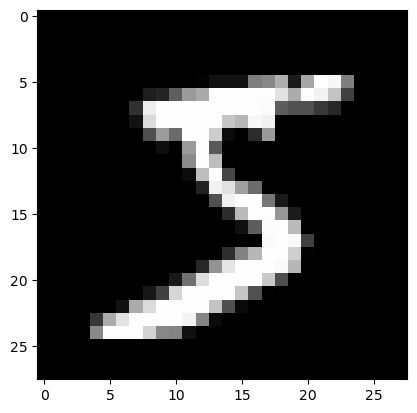

In [39]:
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print(y[0])

### 훈련 데이터와 테스트 데이터 분리

In [36]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

### 다층 퍼셉트론

In [70]:
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100)) # fc : fully connected (layer)
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))
# 아래에서 손실 함수로 사용할 크로스 엔트로피에 이미 소프트맥스 함수가 같이 있으므로,
# 마지막 출력층의 활성화 함수는 추가하지 않아도 된다.

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [64]:
from torch import optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

### 학습 및 테스트

In [65]:
def train(epoch):
    model.train() # 모델을 학습 모드로 전환
    
    for data, targets in loader_train:
        optimizer.zero_grad()
        outputs = model(data)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()
    
    print(f'epoch {epoch} : 완료')

In [66]:
def test():
    model.eval() # 모델을 추론 모드로 전환
    correct = 0
    
    with torch.no_grad():
        for data, targets in loader_test:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1) # 확률이 가장 높은 레이블이 무엇인지
            correct += predicted.eq(targets.data.view_as(predicted)).sum() # 정답과 일치한 경우 정답 카운터 +1
    
    data_num = len(loader_test.dataset)
    print(f'테스트 데이터 예측 정확도: {correct}/{data_num} ({100.*correct/data_num:.0f}%)')

In [67]:
test()

테스트 데이터 예측 정확도: 1040/10000 (10%)


In [68]:
for epoch in range(3):
    train(epoch)

test()

epoch 0 : 완료
epoch 1 : 완료
epoch 2 : 완료
테스트 데이터 예측 정확도: 9573/10000 (96%)
